# Simple Linear Regression
Linear regression is a statistical method that allows us to study relationships between two **continuous quantitative (measurable) variables**. 

A regression model attempts to predict the value of one variable, known as the **dependent variable, response variable, or label**, using the values of other variables, known as **independent variables, explanatory variables, or features**. 

Simple regression has one label used to predict one feature. Multiple regression uses two of more feature variables to predict one feature. Can we use X to predict Y? 

We're learing linear regression today because it's: 
- Very widely used
- Quick to implement and run
- Easy to interpret
- The basis for many other models

## Assumptions of Linear Regression
Linear regression is a parametric model, which means that we make some assumptions about our dataset that must be roughly fulfilled in order for us to use this model. 

### Check before modeling: 
- A **Linear relationship** between the dependent (target) and independent (features) variables
- **No Multicollinearity**: The independent variable does not have a strong correlation with other variables in the dataset

### Check after modeling: 
- **Homoscedasticity**: Error is independent and random 
- **Residual**- Measured error terms are normally distributed. This can be assured with enough data points thanks to the Central Limit Theorum

## Linear model of a straight line

Let's have a look at the simplest case of a regression model for a straight line. If we have one feature and one label, and there are some number of values pairs, ${x_i,y_i}$, we can define a line that best fits that data.  

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

$$where\\
slope (m) = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y = b\ at\ x = 0$$




If we have a number of values pairs, ${x_i,y_i}$, we can write the equation for the line with the errors as:

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = error$$

We can visualize these errors as shown in the figure below.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/LSRegression.jpg" alt="LS Regression" style="width: 450px;"/>
<center>**Example of Ordinary Least Squares Regression**</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression**.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

## Ordinary Least Squares Regression
OLS is one of the simplest models to implement because rather than having to search for values by trial and error or calculate them analytically using more advanced linear algebra, we can estimate them directly from our data. 

In the dataset we'll create below, A and X are independent features, and Y is the dependent target variable. For our regression, we're only interested in the relationship between X and Y: 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

A = [1000, 57, 899, 22, 42, 55, 80, 46112, 3, 222, 563, 7]
X = [1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.0, 2.2, 2.5, 2.6, 2.8, 3.0]
Y = [39111, 39199, 41225, 41300, 43556, 43677, 44557, 46112, 47118, 48888, 48999, 49500]

df = pd.DataFrame(zip(A, X, Y), columns=["A", "X", "Y"])

In [50]:
df.head()

,A,X,Y
0,1000,1.1,39111
1,57,1.2,39199
2,899,1.3,41225
3,22,1.4,41300
4,42,1.5,43556


## Testing Assumption 1: Linear Relationship
We can quickly test for a linear relationship between X and Y using a scatterplot: 

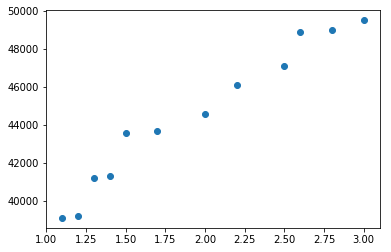

In [47]:
%matplotlib inline

plt.scatter(df.X, df.Y)

We can see from our dataplot that there is a linear relationship here, so let's check the second assumption. 

## Testing Assumption 2: Multicollinearity
We can calculate the Pearson's Correlation Coefficient to test the correlation between the two independent variables A and X, and our feature Y. 

It's okay to see some correlation between X and Y, but we don't want to see high correlation between A and X because that would make it impossible to accurately test how X is affecting Y independent of A. 

In [48]:
df.corr()

,A,X,Y
A,1.000000,0.113824,0.132678
X,0.113824,1.000000,0.979541
Y,0.132678,0.979541,1.000000


The correlation between A and X and A and Y is low, so we will be able to move forward with a linear regression bewteen X and Y. mm

## Creating a Simple Linear Regression

### Creating a line of best fit
The goal of any statistical model is to minimize error. For linear regression, this means finding the line we can draw through the data that gives us back the smallest sum of squared erorrs. 

Remember that the equation we are solving for using our data points is: 

  ![linear_equation](./linear_equation.png)

Where: 
- Y is the output value we want to predict
- B0 is called the intercept because it determines where the line intercepts the y-axis
- B1 s called the slope because it defines the slope of the line or how x translates into a y value before we add our bias
- The goal is to find the best estimates for the other coefficients that minimizes the errors in predicting y from x

#### 1. Calculating Slope (B1)
We can use the following equation to estimate slope from a dataset:   

`B1 = corr(x, y) * (stdev(y) / stdev(x))`

We'll start by getting the Pearson's Correlation Coefficient (R^2) between X and Y: 

In [53]:
r_sq = df[["X", "Y"]].corr() 
r_sq

,X,Y
X,1.000000,0.979541
Y,0.979541,1.000000


Now we can multiply 0.989485 times the standard deviation of y divided by the standard deviation of x: 

In [56]:
B1 = 0.979541 * (np.std(df.Y)/np.std(df.X))

In [58]:
print("For 1 unit of change in X, we can predict {} units of change in Y".format(B1))

For 1 unit of change in X, we can predict 5489.9914985764635 units of change in Y


Check this against your scatterplot; does that seem reasonable? 

### 3. Calculating the Intercept
Now we can figure out where the point where the line crosses the Y axis. This part is easy since we have already solved for B1:   
    `B0 = mean(y) – B1 * mean(x)`

In [59]:
B0 = df.Y.mean() - (B1 * df.X.mean())
B0

33777.09984026404

Again, compare this with your scatterplot and make sure it's reasonable. 

### 4. Plotting the line of best fit
Now that we have an equation for our line, we can use it to draw a line of best fit through the data points:   
`y = B0 + (B1 * x) + error` 

We can calculate the predictions for every point in our dataset: 

In [60]:
df["y_line"] = B0 + (B1 * df.X)

In [61]:
df.head()

,A,X,Y,y_line
0,1000,1.1,39111,39816.090489
1,57,1.2,39199,40365.089639
2,899,1.3,41225,40914.088788
3,22,1.4,41300,41463.087938
4,42,1.5,43556,42012.087088


And we can use that information to plot the regression line: 

Text(0.5, 0, 'Independent Variable')

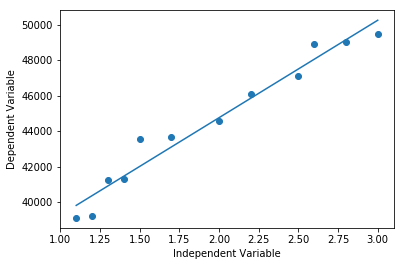

In [62]:
plt.scatter(df.X,df.Y) # create the main scatter plot
plt.plot(df.X, df.y_line) # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

First, we'll learn how to implement the model in python, then we'll learn how to check the final two assumptions and evaluate our model. 